In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset
df = pd.read_csv("HeartAttackDataScaled.csv")

# Quick look at the data
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,0.625557,Male,-0.641579,158/88,-0.147042,0,0,1,0,0,...,0.179251,1.280130,0.373454,-0.588539,-1.528843,-0.514750,Argentina,South America,Southern Hemisphere,0
1,-1.539322,Male,1.596895,165/93,1.118179,1,1,1,1,1,...,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,Canada,North America,Northern Hemisphere,0
2,-1.539322,Female,0.793023,174/99,-0.147042,1,0,0,0,0,...,1.001031,0.955917,-0.113134,0.756800,0.223577,-1.520604,France,Europe,Northern Hemisphere,0
3,1.425621,Male,1.522691,163/100,-0.098380,1,1,1,0,1,...,0.477557,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,Canada,North America,Northern Hemisphere,0
4,0.578495,Male,0.718820,91/88,0.874867,1,1,1,1,0,...,-1.292170,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,Thailand,Asia,Northern Hemisphere,0


In [3]:
# Basic dataset info
print("Shape of dataset:", df.shape)   # rows, columns
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Count total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_count}")

Shape of dataset: (8763, 26)

Column names: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']

Data types:
 Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
D

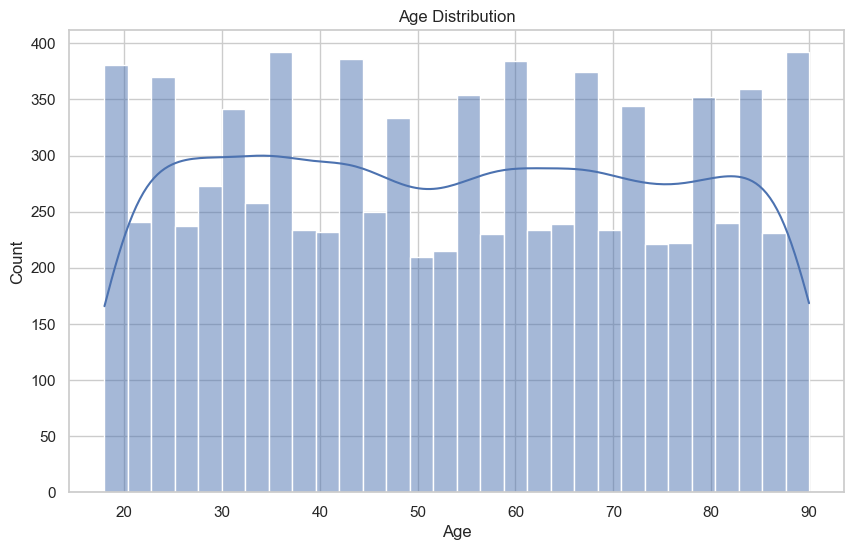

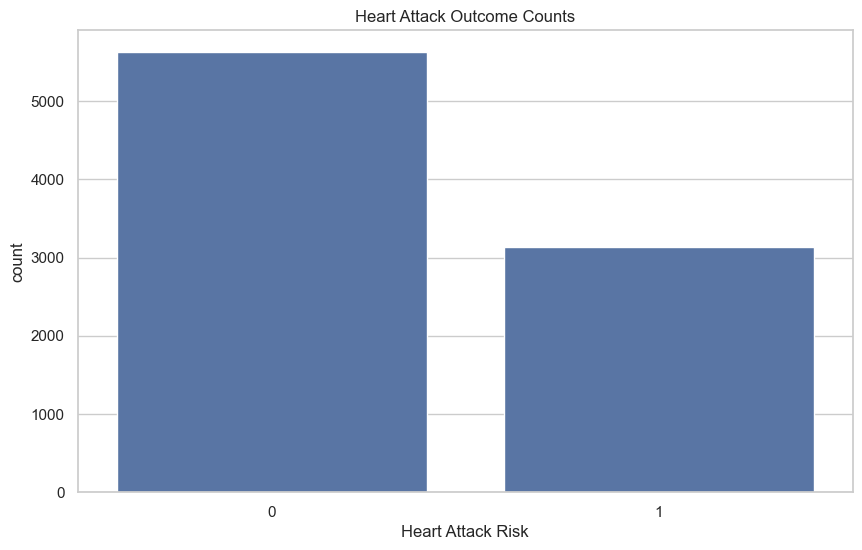

In [14]:
# Univariate analysis
# Example: distribution of age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Example: count of target variable (heart attack yes/no)
sns.countplot(x='Heart Attack Risk', data=df)
plt.title("Heart Attack Outcome Counts")
plt.show()

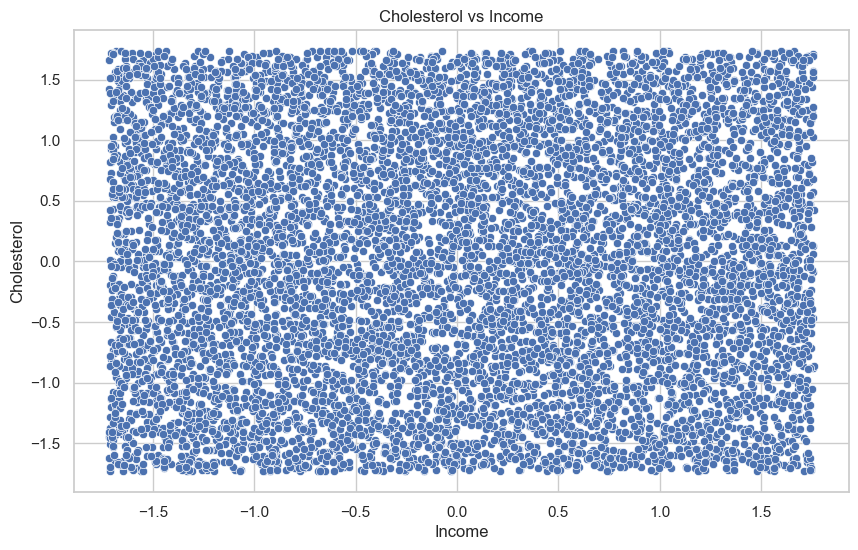

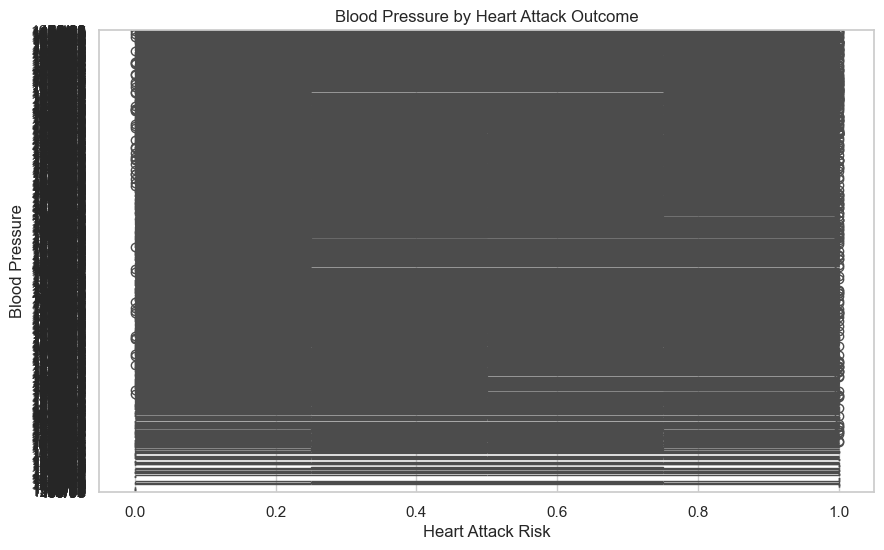

In [3]:
# Bivariate analysis
# Age vs. cholesterol
sns.scatterplot(x='Income', y='Cholesterol', data=df)
plt.title("Cholesterol vs Income")
plt.show()

# Boxplot: blood pressure by outcome
sns.boxplot(x='Heart Attack Risk', y='Blood Pressure', data=df)
plt.title("Blood Pressure by Heart Attack Outcome")
plt.show()

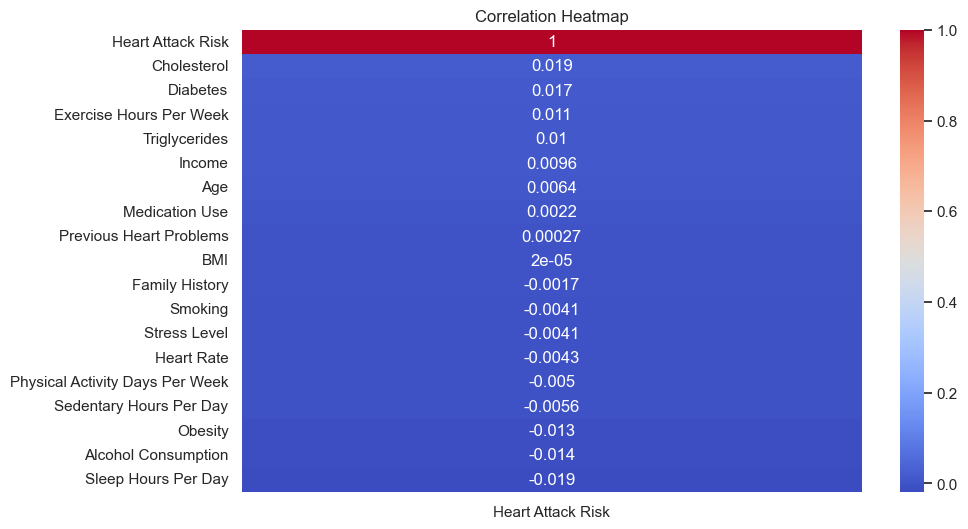

In [4]:
# Correlation analysis
corr = df.corr(numeric_only=True)  # only numeric columns

# Show only correlations with the target column
sns.heatmap(df.corr(numeric_only=True)[['Heart Attack Risk']].sort_values(by='Heart Attack Risk', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Next steps
# Handle missing values (drop or impute)
# Encode categorical variables (e.g., gender: male/female → 0/1)
# Normalize/scale features if needed
# Split into train/test sets for modeling

In [4]:
print(df.nunique())

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [5]:
print(df.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [8]:
print(df.corr(numeric_only=True))

                                      Age  Cholesterol  Heart Rate  Diabetes  \
Age                              1.000000    -0.009107   -0.003844 -0.014105   
Cholesterol                     -0.009107     1.000000    0.000315 -0.013428   
Heart Rate                      -0.003844     0.000315    1.000000  0.006764   
Diabetes                        -0.014105    -0.013428    0.006764  1.000000   
Family History                   0.008353    -0.021608   -0.013470 -0.013844   
Smoking                          0.394891     0.016342   -0.012331  0.000527   
Obesity                         -0.008140    -0.014843    0.012725  0.012866   
Alcohol Consumption             -0.006666    -0.007261    0.003459  0.005551   
Exercise Hours Per Week          0.001206     0.021517    0.008276 -0.007014   
Previous Heart Problems          0.000868    -0.006070   -0.004956  0.000867   
Medication Use                   0.000980    -0.000905    0.009244 -0.002656   
Stress Level                     0.01830

In [ ]:
# Calculate mean, median, and mode only for numeric columns
numeric_df = df.select_dtypes(include=['number'])

mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

Mean:
 Age                                    53.707977
Cholesterol                           259.877211
Heart Rate                             75.021682
Diabetes                                0.652288
Family History                          0.492982
Smoking                                 0.896839
Obesity                                 0.501426
Alcohol Consumption                     0.598083
Exercise Hours Per Week                10.014284
Previous Heart Problems                 0.495835
Medication Use                          0.498345
Stress Level                            5.469702
Sedentary Hours Per Day                 5.993690
Income                             158263.181901
BMI                                    28.891446
Triglycerides                         417.677051
Physical Activity Days Per Week         3.489672
Sleep Hours Per Day                     7.023508
Heart Attack Risk                       0.358211
dtype: float64

Median:
 Age                                  

In [7]:
#Find standard deviation
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Standard deviation of numeric columns
std_values = numeric_df.std()
var_values = numeric_df.var()

print("Standard Deviation:\n", std_values)
print("\nVariance:\n", var_values)

Standard Deviation:
 Age                                   21.249509
Cholesterol                           80.863276
Heart Rate                            20.550948
Diabetes                               0.476271
Family History                         0.499979
Smoking                                0.304186
Obesity                                0.500026
Alcohol Consumption                    0.490313
Exercise Hours Per Week                5.783745
Previous Heart Problems                0.500011
Medication Use                         0.500026
Stress Level                           2.859622
Sedentary Hours Per Day                3.466359
Income                             80575.190806
BMI                                    6.319181
Triglycerides                        223.748137
Physical Activity Days Per Week        2.282687
Sleep Hours Per Day                    1.988473
Heart Attack Risk                      0.479502
dtype: float64

Variance:
 Age                                4.515

In [14]:
df.drop(columns=['Patient ID'], inplace=True)


In [17]:
df.to_csv("HeartAttackDataScaled.csv", index=False)

In [25]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Step 2: Detect binary columns (only contain 0 and 1)
binary_cols = [col for col in numeric_cols if set(df[col].dropna().unique()).issubset({0,1})]

# Step 3: Continuous numeric columns = numeric minus binary
continuous_cols = numeric_cols.difference(binary_cols)

# Step 4: Scale only continuous columns
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Step 5: Save the updated DataFrame to a new CSV file
df.to_csv("HeartAttackDataScaled.csv", index=False)

In [5]:
X = df[["Age", "Sleep Hours Per Day"]]
y = df["Income"]

regr = LinearRegression()
regr.fit(X, y)

predictedIncome = regr.predict([[23, 7], [23, 8]])

print("Predicted Income:", predictedIncome) 

Predicted Income: [-0.08640104 -0.0930032 ]


/Users/madsdegn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
X = df[["Age", "Sleep Hours Per Day"]]
y = df["Income"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model on the training set
regr = LinearRegression()
regr.fit(X_train, y_train)

# Predict on the test set
y_pred = regr.predict(X_test)

# Evaluate performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Example: predict income for Age=23, Sleep=7 and Age=23, Sleep=8
new_data = pd.DataFrame([[23, 7], [23, 8]], columns=["Age", "Sleep Hours Per Day"])
predictedIncome = regr.predict(new_data)
print("Predicted Income:", predictedIncome)

Mean Squared Error: 0.9675753000891882
R² Score: -0.0003691329473898275
Predicted Income: [-0.06782625 -0.07820187]
